In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn.metrics import accuracy_score

In [8]:
#import plotly

#resding dataset


In [9]:
df=pd.read_csv(r'W:\code\code\FYP_HeartDisease\MLModel\dataset.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
#numerical analysis

df['target']
df.groupby('target').size()


target
0    138
1    165
dtype: int64

In [11]:
df.shape

(303, 14)

In [12]:
df.size

4242

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
#check if any null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
#visualization

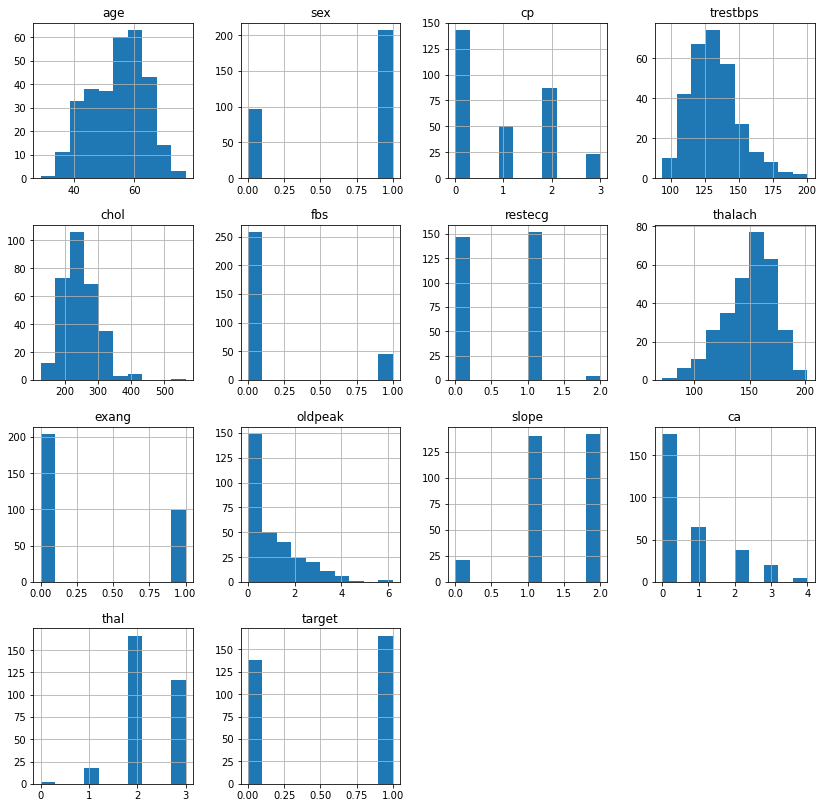

In [16]:
df.hist(figsize=(14,14))
plt.show()

# data preprocessing 

divide the dataset in to x and y such that x contains all the features and y contains the output

In [17]:
x,y=df.loc[:,:'thal'],df['target']

#loc method is used to call the columns by its name
#loc used to Access a group of rows and columns by label(s) or a boolean array.
#ilock method is used to call the columns by its index value

x



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [18]:
y



0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [19]:
# dividing the dataset for training and testing (Split arrays or matrices into random train and test subsets)



In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3,test_size=0.3,shuffle=True)

In [23]:
x_train


array([[ 1.39335191,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [-0.48155814, -1.46841752,  1.00257707, ..., -0.64911323,
        -0.71442887, -0.51292188],
       [-2.13589054,  0.68100522, -0.93851463, ..., -0.64911323,
        -0.71442887,  1.12302895],
       ...,
       [-0.59184697, -1.46841752,  0.03203122, ..., -0.64911323,
        -0.71442887, -0.51292188],
       [ 1.61392956,  0.68100522,  1.00257707, ..., -0.64911323,
         2.22410436,  1.12302895],
       [ 1.06248543,  0.68100522,  1.97312292, ..., -0.64911323,
        -0.71442887,  1.12302895]])

x_test

# making the model with suitable algorithms


#Decission Tree classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=7)
dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=7)

In [25]:
x_test

array([[-0.7021358 ,  0.68100522, -0.93851463, ..., -0.64911323,
        -0.71442887,  1.12302895],
       [-1.47415758,  0.68100522,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [-0.04040284,  0.68100522, -0.93851463, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [-0.37126932, -1.46841752,  1.00257707, ...,  0.97635214,
         0.26508221, -0.51292188],
       [ 1.39335191,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.40075247,  0.68100522, -0.93851463, ...,  0.97635214,
         1.24459328,  1.12302895]])

In [26]:
prediction=dt.predict(x_test)

In [27]:
prediction

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [28]:
y_test

245    0
162    1
10     1
161    1
73     1
      ..
248    0
204    0
40     1
166    0
236    0
Name: target, Length: 91, dtype: int64

In [29]:
accuracy_dt=accuracy_score(y_test,prediction)*100

In [30]:
accuracy_dt

78.02197802197803

In [31]:
dt.feature_importances_

array([0.10018827, 0.03090784, 0.25029042, 0.08343661, 0.0709562 ,
       0.        , 0.03276099, 0.0820839 , 0.01419643, 0.09181439,
       0.04469658, 0.11071782, 0.08795054])

 Plotting the most imp feature
 

ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of ticklabels (303).

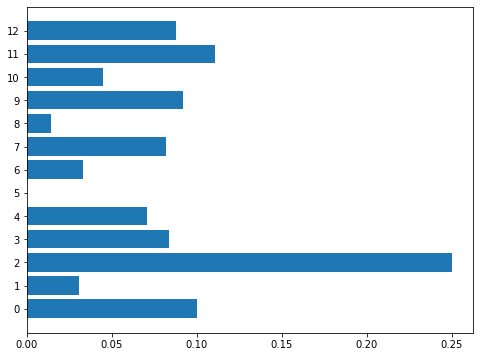

In [32]:
def plot_most_important_feature(model):
    plt.figure(figsize=(8,6))
    n_features=13
    plt.barh(range(n_features),model.feature_importances_,align='center')
    
    plt.yticks(np.arange(n_features),x)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.ylim(-1,n_features)
    
    
plot_most_important_feature(dt)

In [33]:
category=["Your heart is healthy",'Yes, you have a heart disease ']

In [34]:
custom_data=np.array([[52,1,1,120,325,0,1,172,0,0.2,2,0,2]])
custom_data_prediction_dt=dt.predict(custom_data)
custom_data_prediction_dt
print(category[int(custom_data_prediction_dt)])

Yes, you have a heart disease 


#K Nearest Neighbour


In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
#Finding the best value of k
k_range=range(1,26)
scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    prediction_knn=knn.predict(x_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score))

The best value of k is 3 with score : 0.8571428571428571


In [37]:


knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train,y_train)

prediction_knn=knn.predict(x_test)

In [39]:
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
accuracy_knn

85.71428571428571

In [40]:
custom_data=np.array([[52,1,1,120,325,0,1,172,0,0.2,2,0,2]])
custom_data_prediction_knn=knn.predict(custom_data)
print(custom_data_prediction_knn)
print(category[int(custom_data_prediction_knn)])

[1]
Yes, you have a heart disease 


In [66]:
# Which algo did best

<BarContainer object of 2 artists>

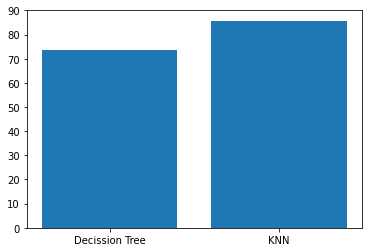

In [35]:
algorithms=["Decission Tree","KNN"]
scores=[accuracy_dt,accuracy_knn]

plt.bar(algorithms,scores)